## Введение в теорию вероятностей. Домашнее задание

###Итоги модуля 
Теория вероятностей возникла на основе анализа азартных игр. Определение закономерности исходов бросков игральных костей и вычисление шансов на выигрыш в таких играх привели учёных к интуитивному определению вероятности. Классическая формула вероятности — это отношение числа благоприятных исходов ко всем исходам. 
На уроке изучались вероятности, возникающие на примере бросания игральных кубиков и подбрасывания монетки. Также мы обсудили разницу вероятностных и статистических моделей. В конце модуля было введено понятие геометрической вероятности и рассмотрен связанный с ней метод Монте-Карло.

### Цели домашнего задания
- Закрепить полученные знания об определении вероятности.
- С помощью ряда статистических экспериментов лучше осознать разницу между вероятностной и статистической картиной мира.
- Ближе познакомиться с поведением случайных величин на практике, применив метод Монте-Карло.

### Что нужно сделать
В домашнем задании предлагается воспользоваться Jupyter Notebook для проведения наглядных статистических экспериментов. Это задачи на анализ подбрасывания монетки, бросания двух игральных кубиков и подсчёта площадей методом Монте-Карло. 
Нужно запустить готовый код, дописать его там, где требуется, посмотреть, как работает эксперимент и как зависят его результаты от различных факторов. В каждой задаче также предлагается ответить на несколько вопросов и аргументировать свой ответ.

### Что оценивается
Умение построить взаимосвязь между теоретическими вероятностями и статистическими экспериментами. В каждой задаче требуется поэкспериментировать с разными значениями параметров функций и ответить на вопросы. Задача считается выполненной, если выполнены все её условия, а также даны аргументированные ответы на вопросы.
Во втором задании также требуется дописать программу.

### Как отправить задание на проверку
Выполните задания, сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него через форму на платформе.

Кроме того, задания содержат несколько вопросов. Напишите ответы на эти вопросы сразу в форме. Постарайтесь аргументировать ваш ответ.


### Импорт библиотек

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

### **Задание 1.** 
Функция `coinToss` позволяет смоделировать процесс подбрасывания монетки любое количество раз. Это число задаётся параметром `number`. В результате функция выводит число испытаний и доли орлов и решек в последнем эксперименте, а также рисует график, на котором представлена суммарная доля выпавших орлов ко всем испытаниям с увеличением номера `n` от 1 до `number`.

1. Поэкспериментируйте и запустите функцию на разных значениях number. Проанализируйте поведение графика. Какими свойствами обладает кривая? 

2. К чему стремится доля орлов при увеличении числа испытаний? Как можно это объяснить?


In [2]:
def coinToss(number):
    recordList, proportionList, orli, reshki = [], [], 0, 0
    rangeList = range(1, number+1) #количество бросков
    for i in rangeList: 
        flip = random.randint(0, 1) #возвращает либо 0 (орёл), либо 1 (решка)
        if flip == 0:
            recordList.append("О")
            orli += 1
        else:
            recordList.append("Р")
            reshki += 1
        proportionList.append(orli/i)
    
    print("Число испытаний: "+ str(number))
    print("Доля орлов: " + str(orli/i) + " Доля решек: " + str(reshki/i))
    
    #Построение графика
    plt.figure(figsize=(40, 10), dpi=80)
    plt.plot(rangeList, proportionList)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number+4, step=5))
    plt.yticks(np.arange(0, 1.1, step=0.1))

Число испытаний: 5
Доля орлов: 0.6 Доля решек: 0.4


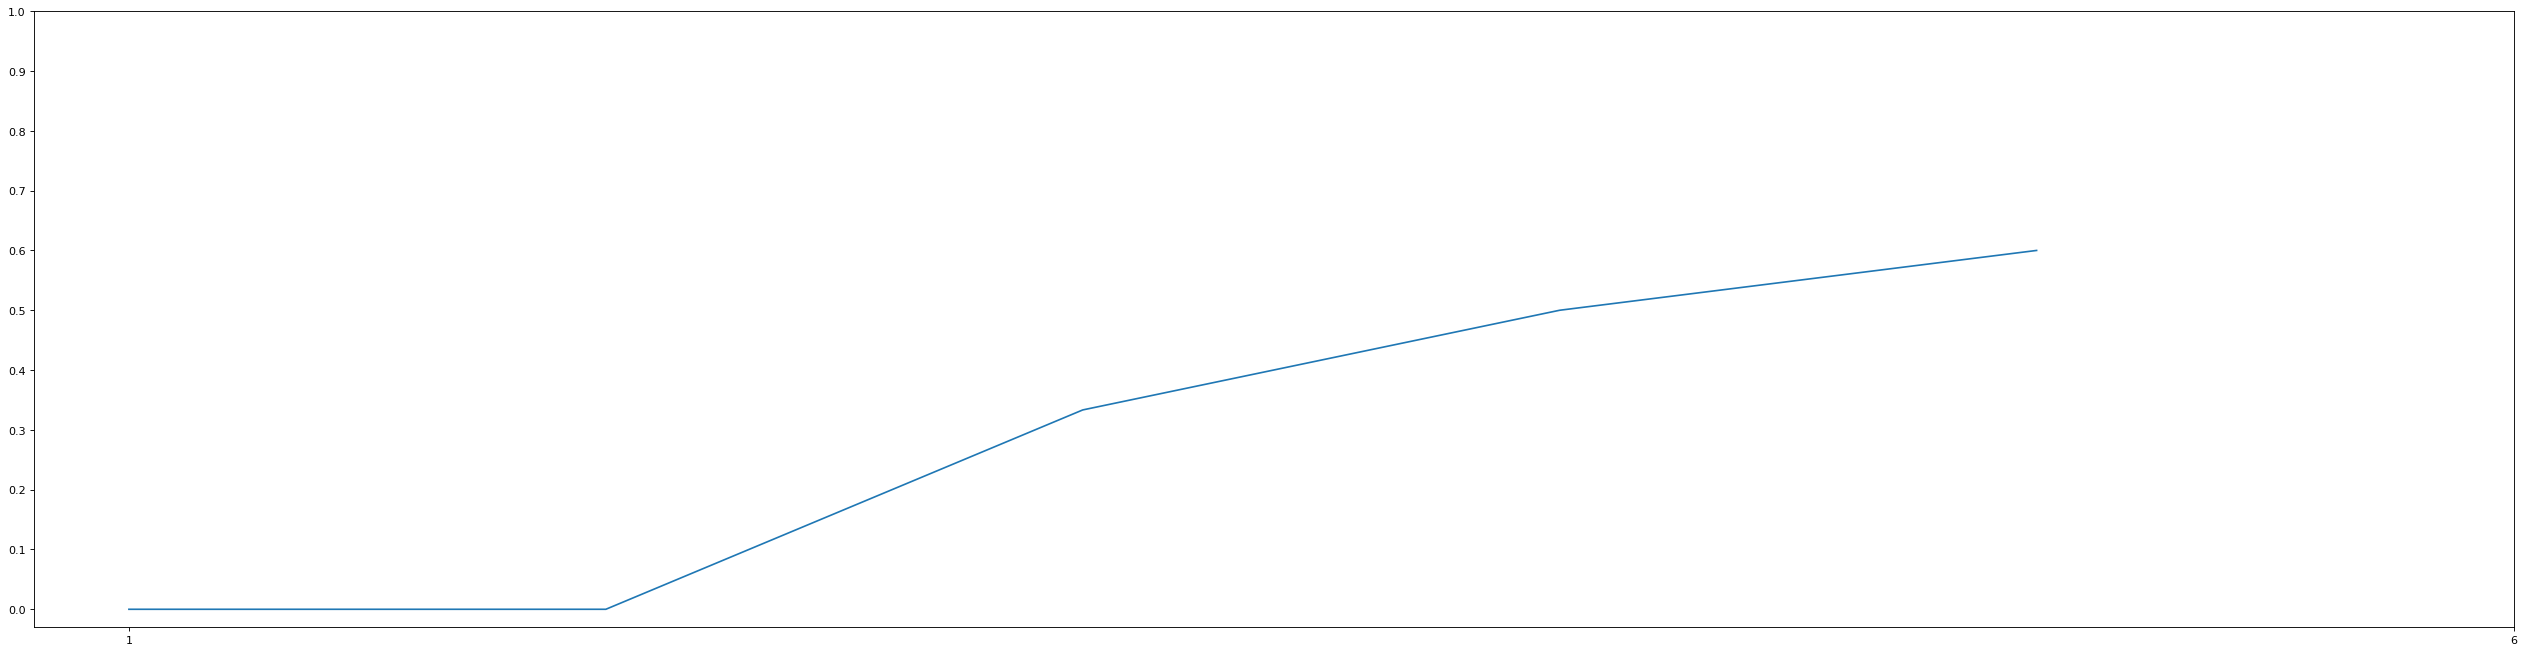

In [3]:
coinToss(5)

Число испытаний: 20
Доля орлов: 0.55 Доля решек: 0.45


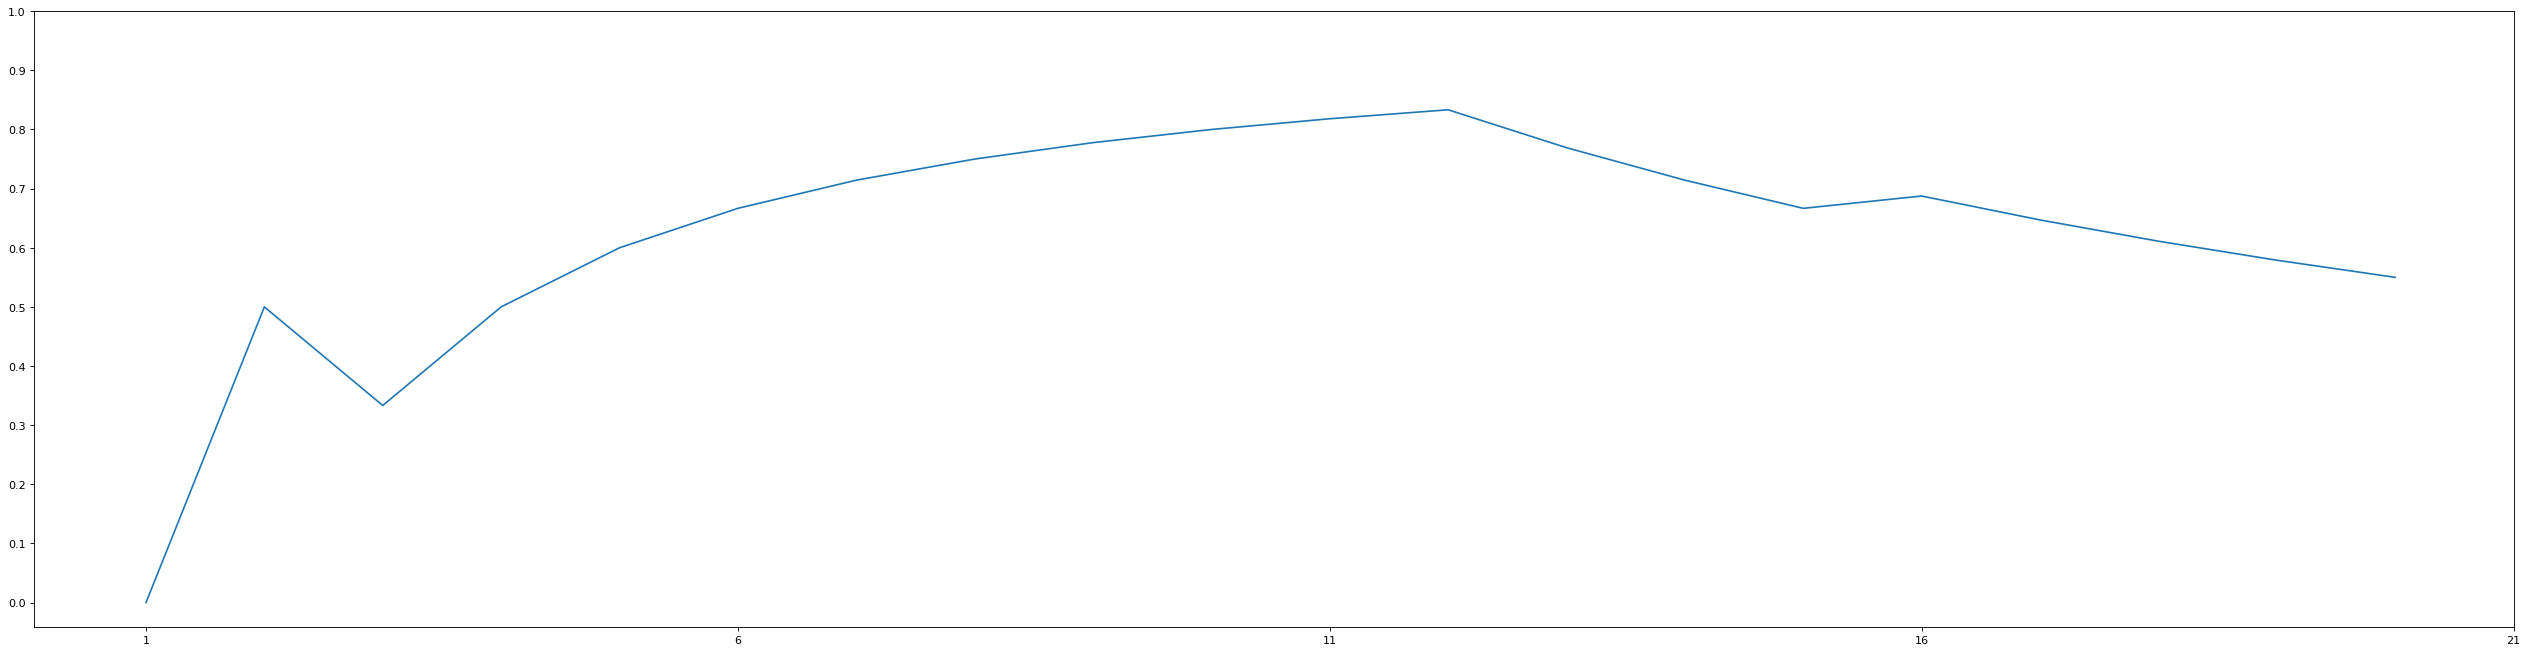

In [4]:
coinToss(20)

Число испытаний: 200
Доля орлов: 0.535 Доля решек: 0.465


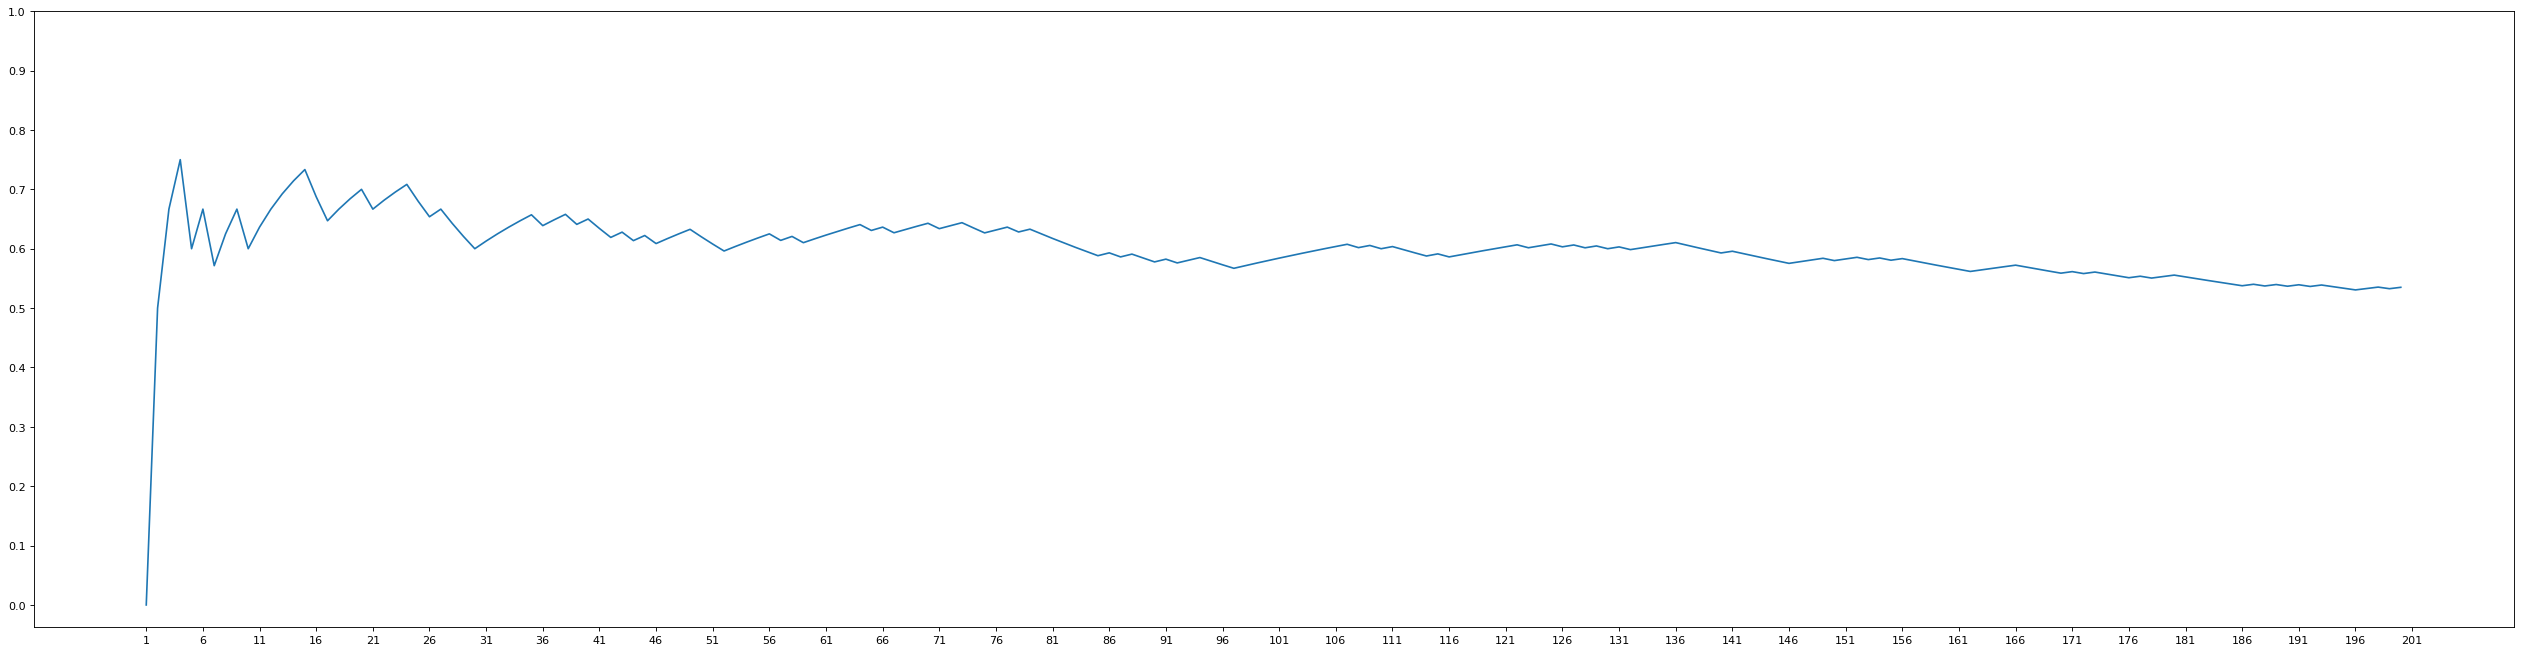

In [5]:
coinToss(200)

Число испытаний: 1000
Доля орлов: 0.506 Доля решек: 0.494


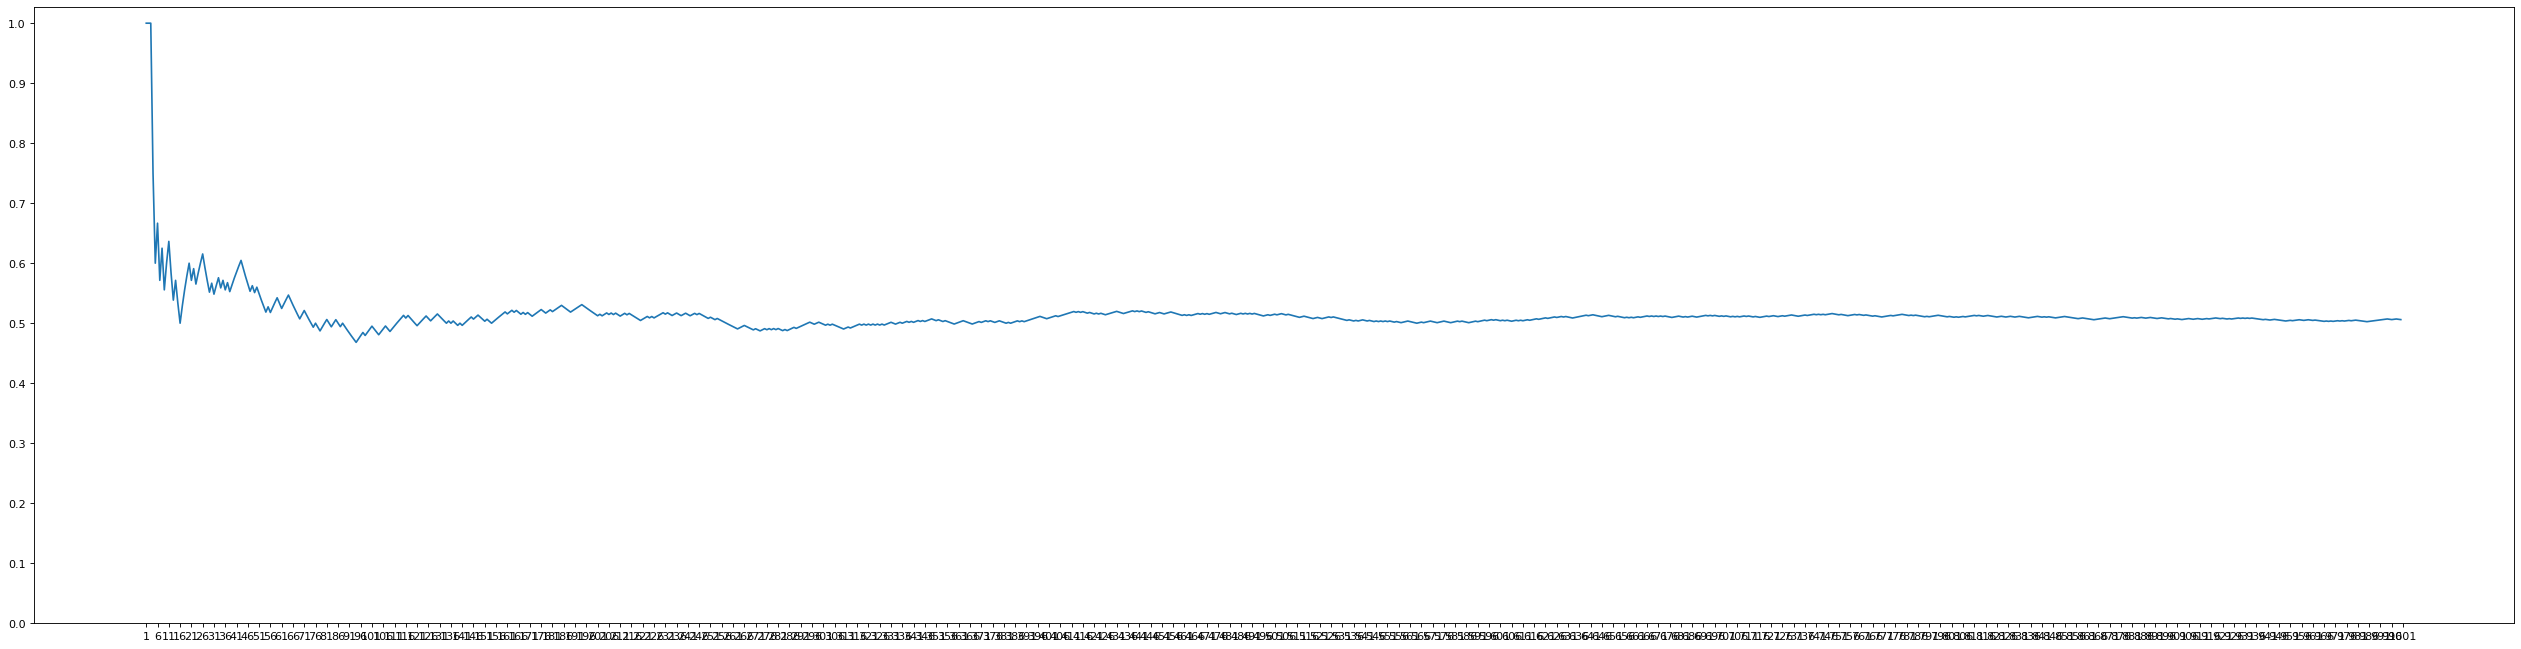

In [6]:
coinToss(1000)

Число испытаний: 10000
Доля орлов: 0.4996 Доля решек: 0.5004


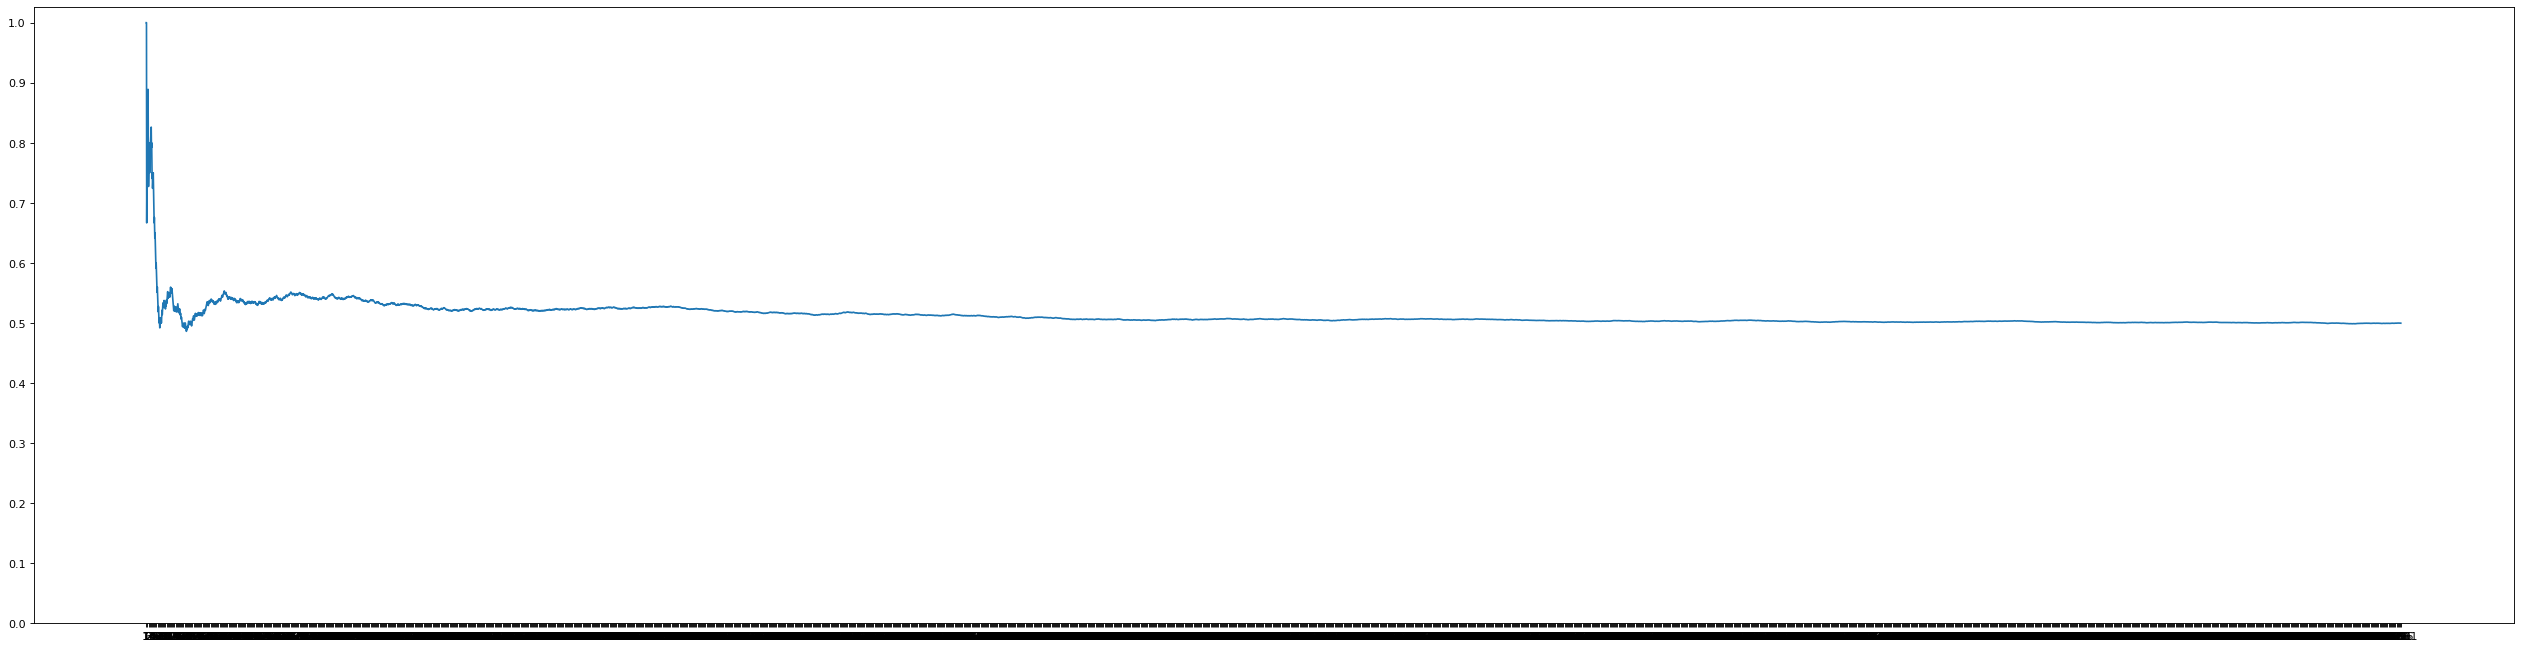

In [7]:
coinToss(10000)

Ответы:
1. Снача на графике видны сильные колебания, однако с увеличением числа экспериментов кривая постепенно стремится к прямой.
2. Доля орлов стремится к 0.5. По теории доля орла также равна 0.5 [так как шанс выпадения орла/решки при использовании честной монеты = 0.5]. По закону больших чисел доля орлов со временем стремится к этой вероятности. Сначала возможны отклонения, но при большом числе бросков они усредняются.

### **Задание 2.** 
Функция `diceLoss` моделирует бросок двух игральных кубиков некоторое количество раз (`number`). В результате выводится вероятность того, что сумма на кубиках будет больше параметра функции `k` (считается доля выпадений, на которых сумма превысит `k`, относительно всех сумм).

1. Поэкспериментируйте с разными `number` и `k`. К каким значениям будет стремиться вероятность при фиксированном `k` и больши́х `number`? Что будет, если брать `k` = 6, 8? Как полученные вероятности будут связаны с теоретическими вероятностями?

2. К чему будет стремиться общая сумма бросков, поделённая на их количество? К чему стремится средняя разность текущего броска и полученного среднего значения? Напишите код на Python на основе исходной функции и объясните результат.


In [ ]:
def diceToss(number, k):
    sumList,recordList= [], [] 
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)
        recordList.append([flip1, flip2])
    
    print('Вероятность, что сумма на кубиках превысит ' +str(k) +' при ' + str(number) + 
          ' испытаниях: ' + str(sum([x > k for x in sumList])/number))
    #Построение графика
    plt.figure(figsize=(40, 10), dpi=80)
    plt.plot(rangeList, sumList)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number+4, step=5))
    plt.yticks(np.arange(1, 13, step=1))
    plt.axhline(y=k, color='r', linestyle='--', linewidth=2)

Вероятность, что сумма на кубиках превысит 6 при 100 испытаниях: 0.63


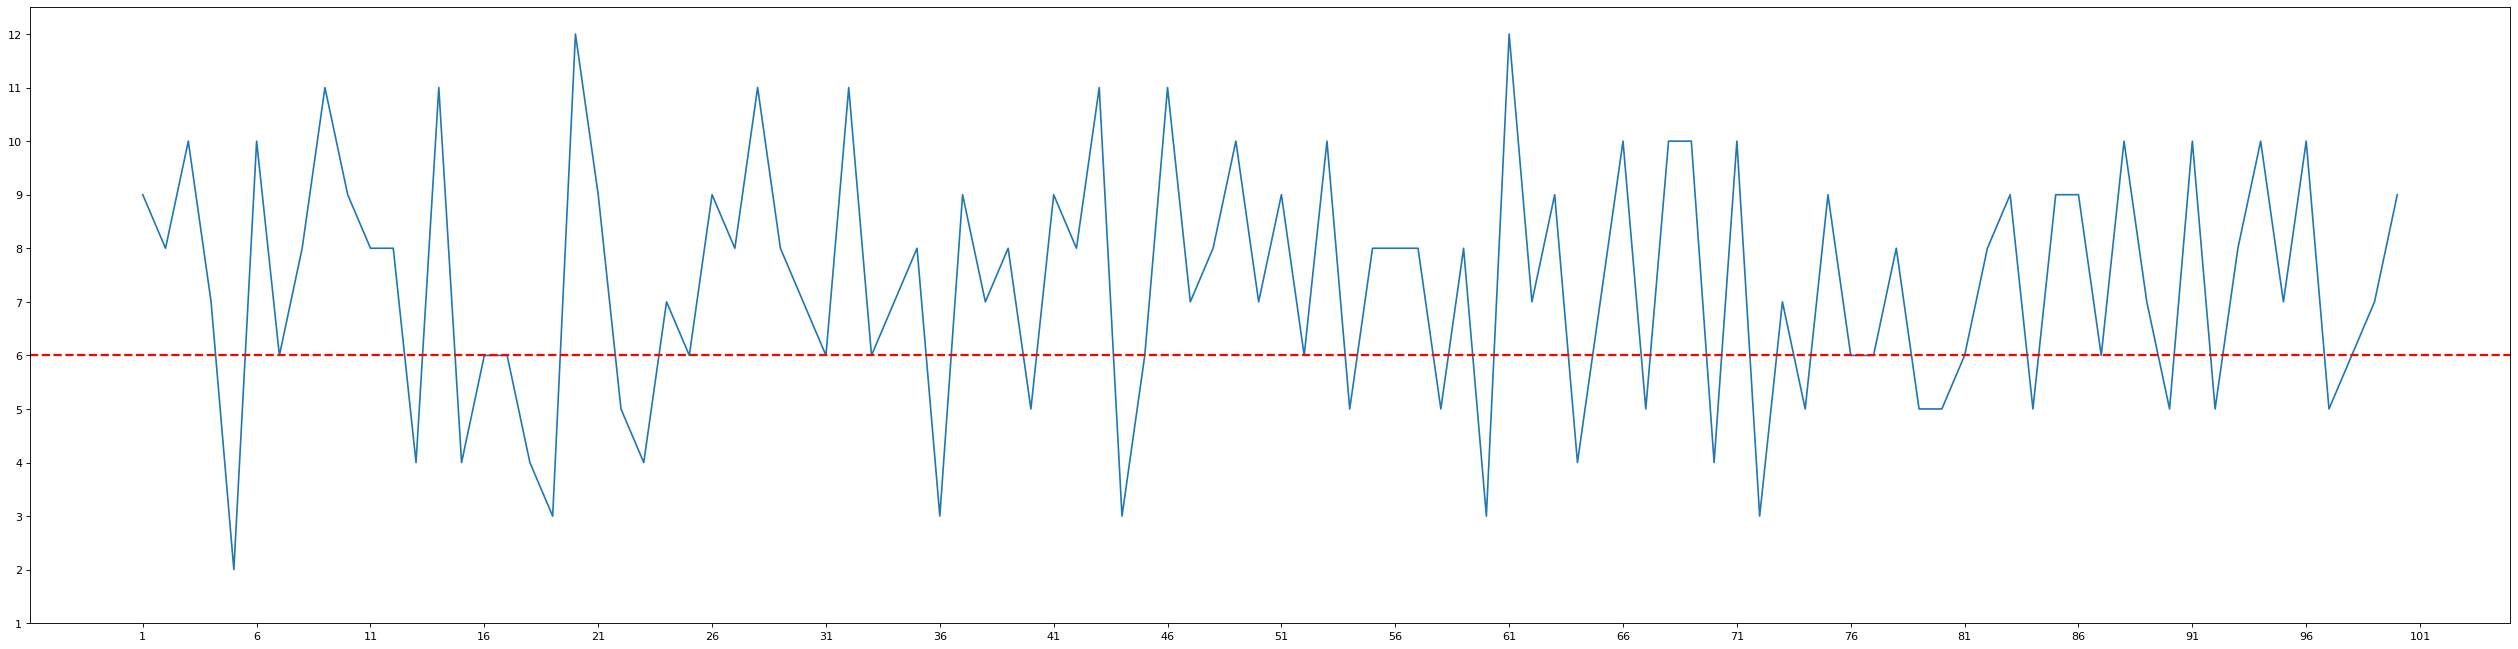

In [34]:
diceToss(100, 6)

Вероятность, что сумма на кубиках превысит 6 при 1000 испытаниях: 0.569


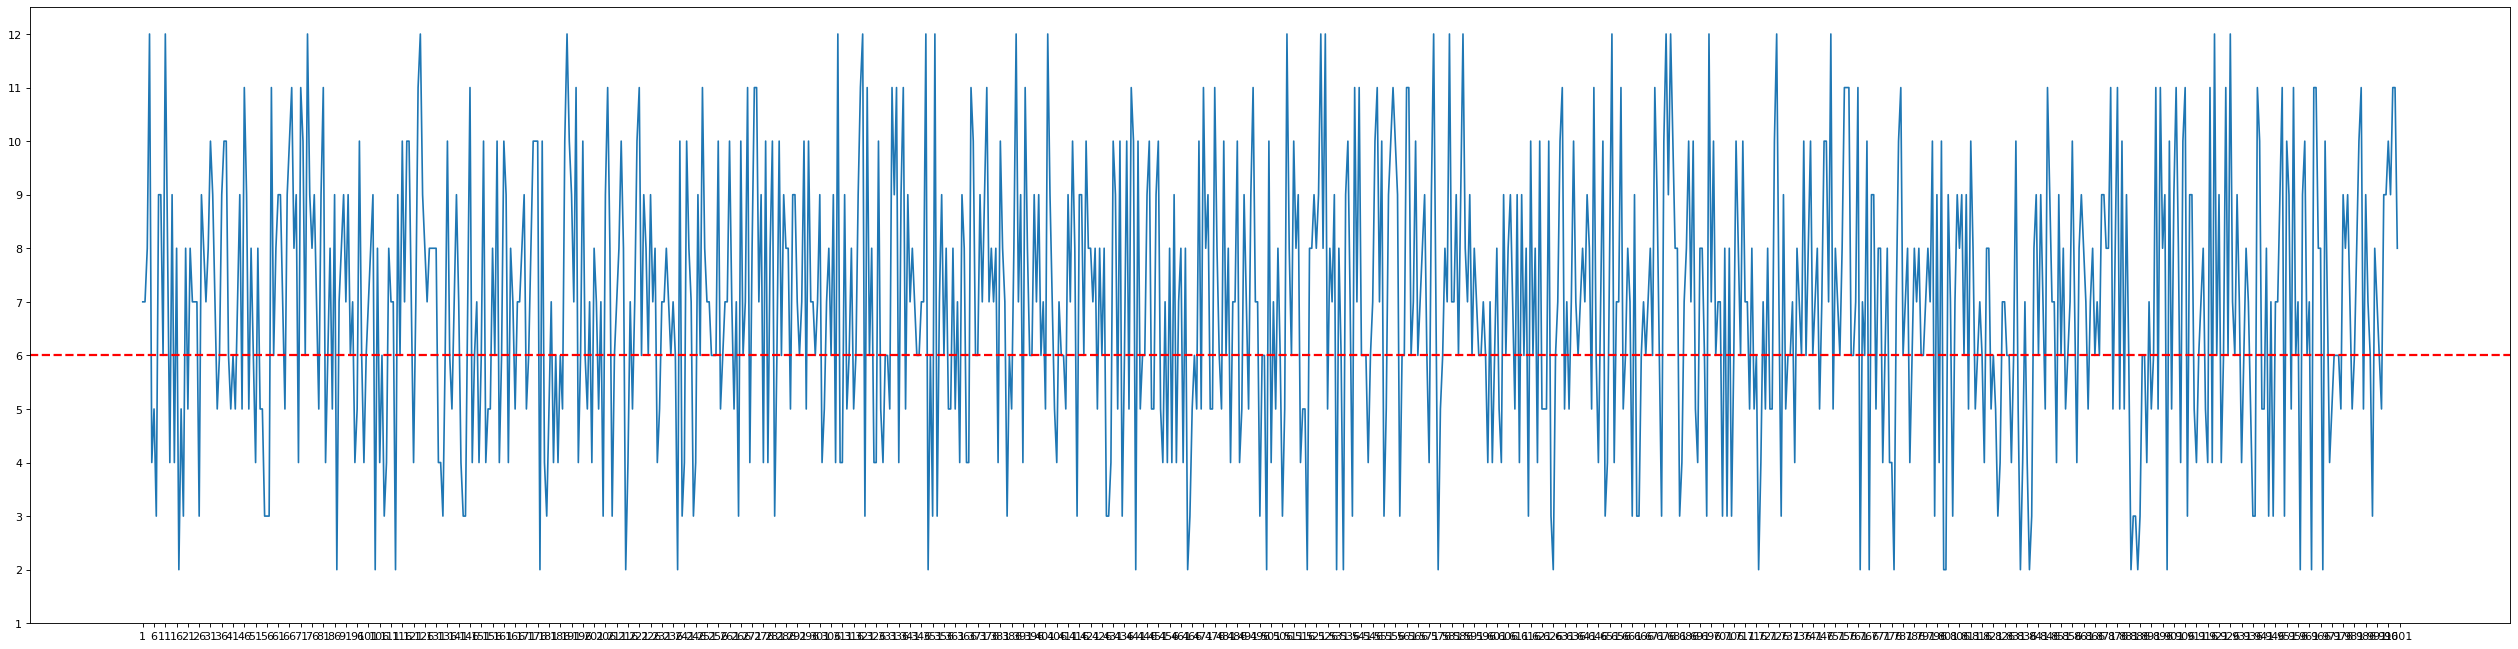

In [37]:
diceToss(1000, 6)

Вероятность, что сумма на кубиках превысит 6 при 10000 испытаниях: 0.5835


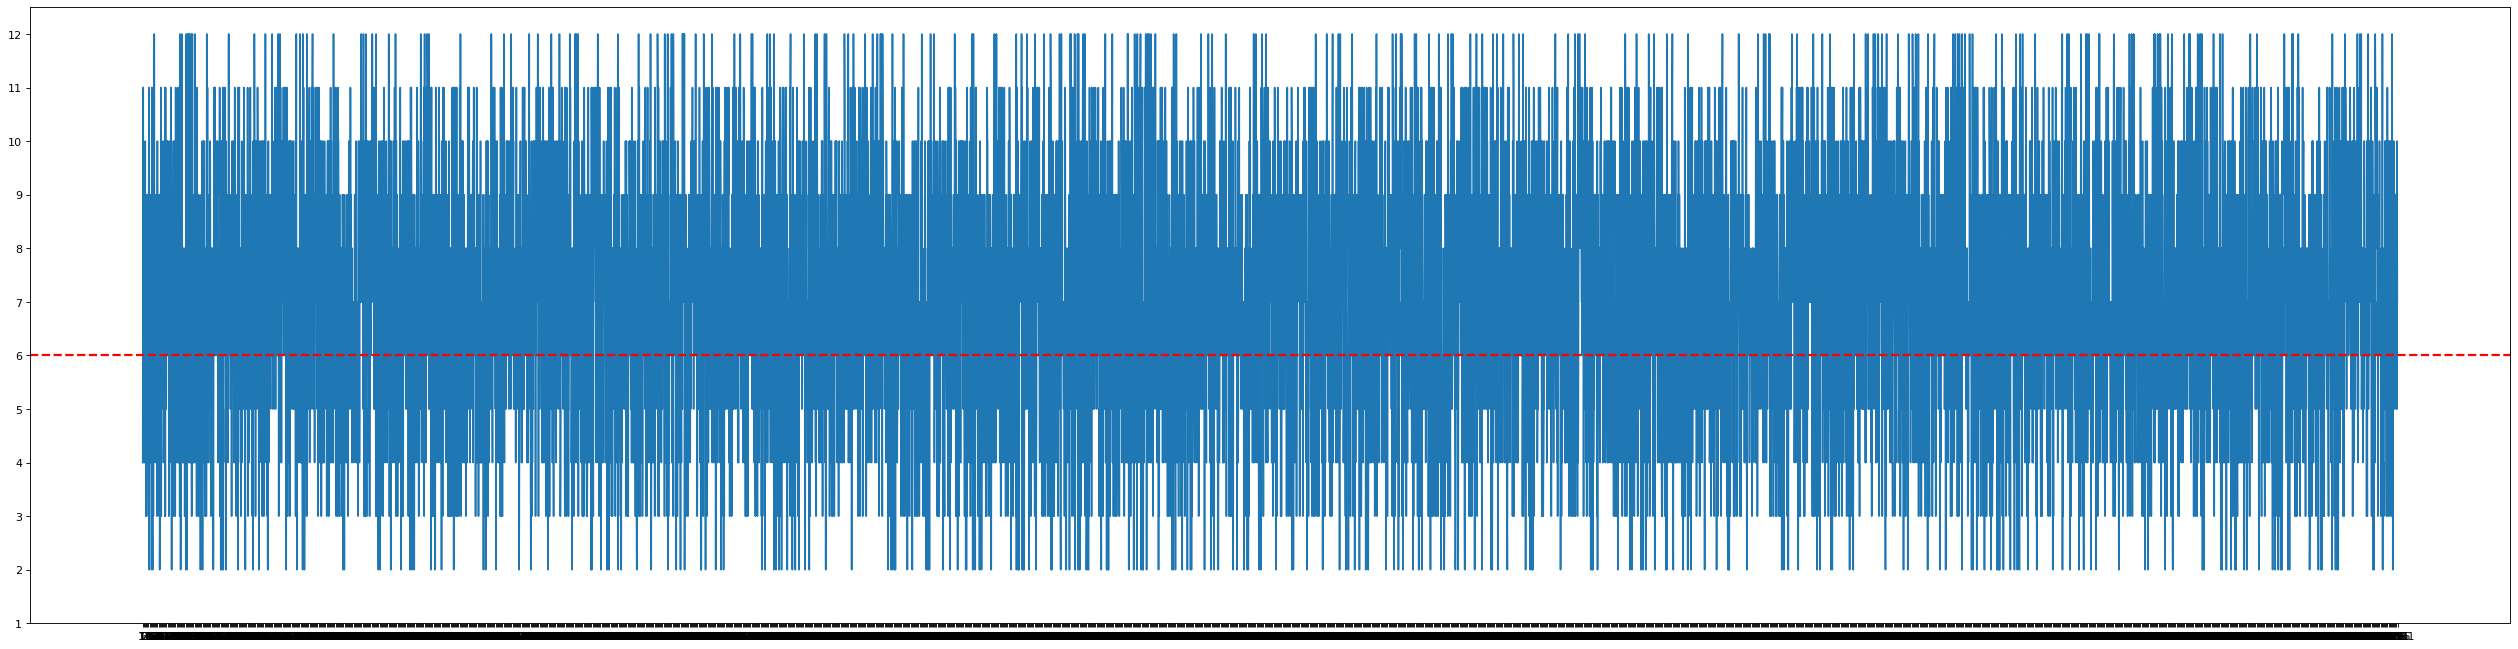

In [38]:
diceToss(10000, 6)

Вероятность, что сумма на кубиках превысит 8 при 100000 испытаниях: 0.27892


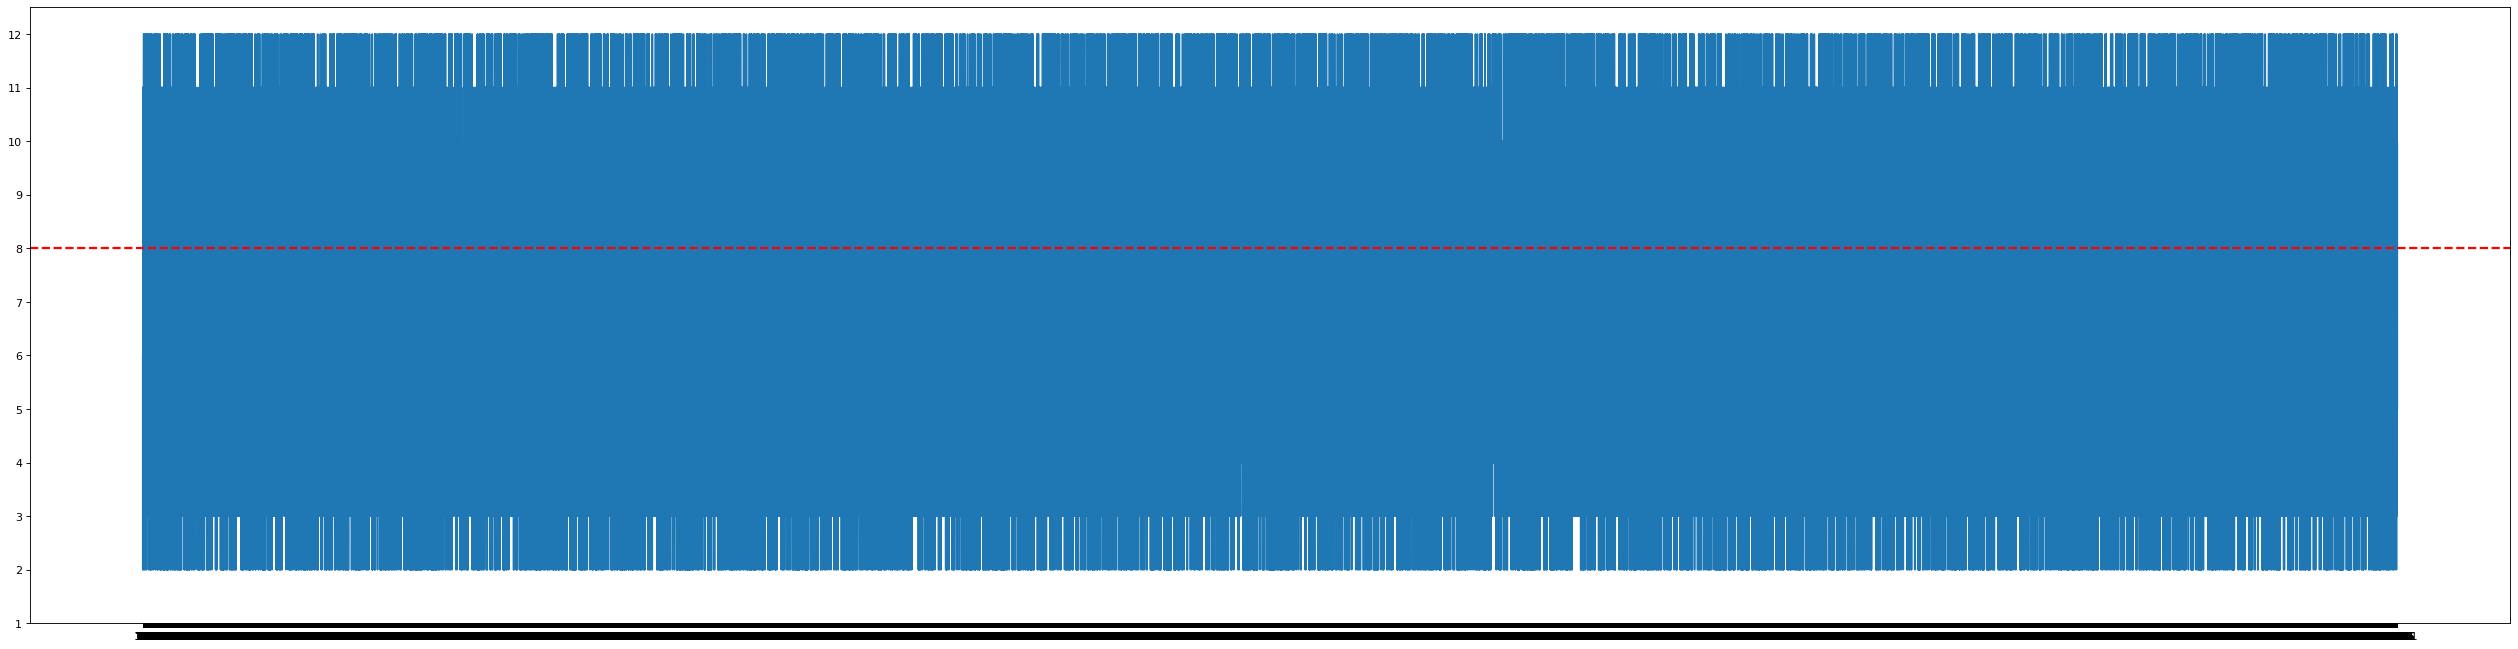

In [40]:
diceToss(100000, 8)

__Ответ на 1 вопрос:__

Вероятность будет стремиться к теоретическому значению выпадения суммы, большей k. Так, к примеру, для "вероятность выпадения суммы, больше 6" будет 1 - 15/36 (значения, при которых сумма <= 6) = 0.584. К этому значению и стремится вероятность на графиках выше. Для 8 это значение близко к 0.278.


In [ ]:
def diceToss_avg(number):
    sumList = []
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)

    print('Общая сумма бросков ' + str(sum(sumList)) +' / ' + str(number) + 
          ' испытаниях: ' + str(sum(sumList)/number))

In [50]:
diceToss_avg(10000)

Общая сумма бросков 70174 / 10000 испытаниях: 7.0174


In [51]:
diceToss_avg(100000)

Общая сумма бросков 700310 / 100000 испытаниях: 7.0031


In [58]:
def diceToss_current_avg(number):
    sumList = []
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum - 7)

    print('Средняя разность ' + str(sum(sumList)) +' при ' + str(number) + 
          ' испытаниях стремится к: ' + str(sum(sumList)/number))

In [59]:
diceToss_current_avg(10000000)

Средняя разность 9575 при 10000000 испытаниях стремится к: 0.0009575


__Ответ на 2 задание__

Общая сумма бросков, поделённая на их количество, будет стремиться к 7.

Средняя разность текущего броска и среднего значения стремится к 0, потому что положительные и отрицательные отклонения от среднего значения компенсируют друг друга.

### **Задание 3.**
 
Как было рассказано в уроке, метод Монте-Карло — это серия численных методов, позволяющих моделировать случайные процессы для изучения некоторого явления. Один из способов применения метода Монте-Карло заключается в измерении различных площадей. Если рассмотреть географическую карту и случайным образом равномерно разбросать на ней точки с произвольными координатами, то окажется, что количество точек в определённом регионе будет пропорционально площади этого региона. Следующая задача как раз на эту тему. 

Ниже представлен код, который делает следующее. На отрезке от −1 до 1 берутся два значения, `x` и `y`, из которых строится точка на плоскости с координатами (x, y). Если такая точка попадает внутрь единичного круга с центром в нуле, то такая точка отмечается синим цветом, в противном случае — красным. Количество точек задаётся параметром `n`.

Вызовите функцию для разных `n`. К чему будет стремиться доля синих точек? Как это связано с площадями геометрических фигур? Проанализируйте, как меняется доля синих точек с ростом количества точек, и сравните её с теоретическим значением площади.


In [60]:
def plot_circle(n):
  x = 2 * np.random.random(int(n)) - 1
  y = 2 * np.random.random(int(n)) - 1
  insideX, insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1] #координаты точек внутри
  outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1] #координаты точек снаружи
  
  print('Число точек внутри круга:', len(insideX))
  print('Число точек снаружи круга:', (len(outsideX)))
  print('Доля точек внутри круга:', len(insideX)/(len(outsideX)+len(insideX)))
  
  #Построение графика
  fig, ax = plt.subplots(1)
  ax.scatter(insideX, insideY, c='b', alpha=0.6, edgecolor=None)
  ax.scatter(outsideX, outsideY, c='r', alpha=0.7, edgecolor=None)
  ax.set_aspect('equal')
  fig.show()

Число точек внутри круга: 769
Число точек снаружи круга: 231
Доля точек внутри круга: 0.769


C:\Users\pvlmakarova\AppData\Local\Temp\ipykernel_33720\2866001636.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


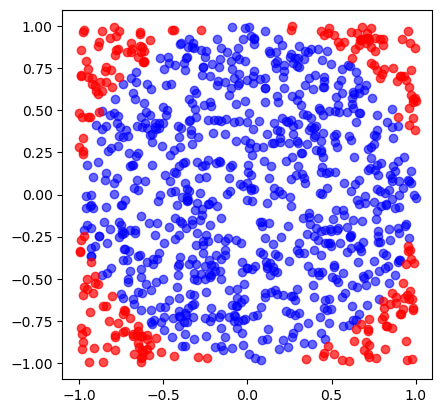

In [66]:
plot_circle(1000)

Число точек внутри круга: 78469
Число точек снаружи круга: 21531
Доля точек внутри круга: 0.78469


C:\Users\pvlmakarova\AppData\Local\Temp\ipykernel_33720\2866001636.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


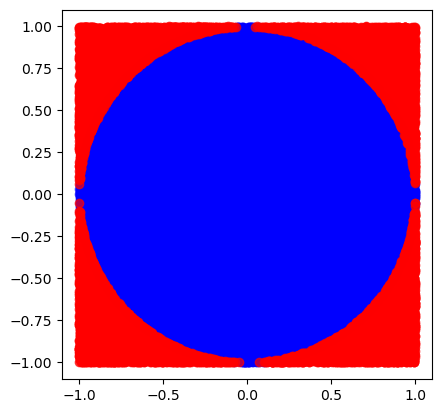

In [68]:
plot_circle(100000)

Доля синих точек будет стремиться к отношению площади круга к площади квадрата, в который он вписан.

Площадь круга: pi*r^2, площадь квадрата: 4r^2. Отношение данных площадей равно pi/4, что примерно равно 0.785. К данному числу и стремится доля точек внутри круга.